### An Exercise on Convolution - Caleb Wilkins 10/12/2021

This notebook contains an easy to follow exercise that illustrates the analysis of the convolution operator for the reader, and proves the important conclusion that the average of a Gaussian distribution is also, in fact, a Gaussian distribution. 

In [1]:
# imports
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats, signal
plt.rcParams["figure.figsize"] = (15,10)

#### Probability brain teaser - testing instinctual reasoning:
Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?

In [2]:
total_possibilities = 36
snakes = 1
sevens = 6 # (1+6, 2+5, 3+4, 4+3, 5+2, 6+1)

In [3]:
snakes_prob = snakes / total_possibilities
sevens_prob = sevens / total_possibilities

print(f'The probability of rolling snake eyes is {snakes_prob:.2f} ' 
      f'and the probability of rolling sevens is {sevens_prob:.2f}.')

The probability of rolling snake eyes is 0.03 and the probability of rolling sevens is 0.17.


#### Convolution
We will now show how to use the convolution operator to determine the probability of the sum of 2 six sided dice analytically (mathematical solution) and numerically (using programming).
##### Analytically:

Considering formula for convolution:
$$
P_{a}(x) \cdot P_{b}(x) = \int P_{a}(x) \cdot P_{b}(x - z) dz = P_{a+b}(x)
$$

For the case of our two die, we would do the following:
$$
P(1) \cdot P(6) + P(2) \cdot P(5) + P(3) \cdot P(4) + P(4) \cdot P(3) + P(5) \cdot P(2) + P(6) \cdot P(1)
$$ 
$$
= 6 \cdot \frac{1}{6} \cdot \frac{1}{6} = \frac{1}{6}
$$

##### Numerically:

In [4]:
# We first create an array that contains 6 values of 1/6 (one sixth) to represent our die
die = np.ones(6)*(1/6)

# We then create another die by simply setting our new variable equal to our previous one
current_die = die

# We then create a final variable that is an array of the results of performing convolution
# on the two 'die' variable using numpy
convul = np.convolve(die, current_die)

In [5]:
convul

array([0.02777778, 0.05555556, 0.08333333, 0.11111111, 0.13888889,
       0.16666667, 0.13888889, 0.11111111, 0.08333333, 0.05555556,
       0.02777778])

In [6]:
print(f'The probability of rolling sevens is {convul[5]:.4f}, which is the \nsame as the result of 1/6 that we got analytically.')

The probability of rolling sevens is 0.1667, which is the 
same as the result of 1/6 that we got analytically.


#### Averaging Convolutions
We'll now repeat what we just did but with 10 die, and then graph the average of our 10 die convolution to analyze the type of distribution that arises.

In [7]:
# This for-loop creates our 10 die and convolves them all together

current_die = die
for i in range(0,9):
    current_die = np.convolve(current_die, die)

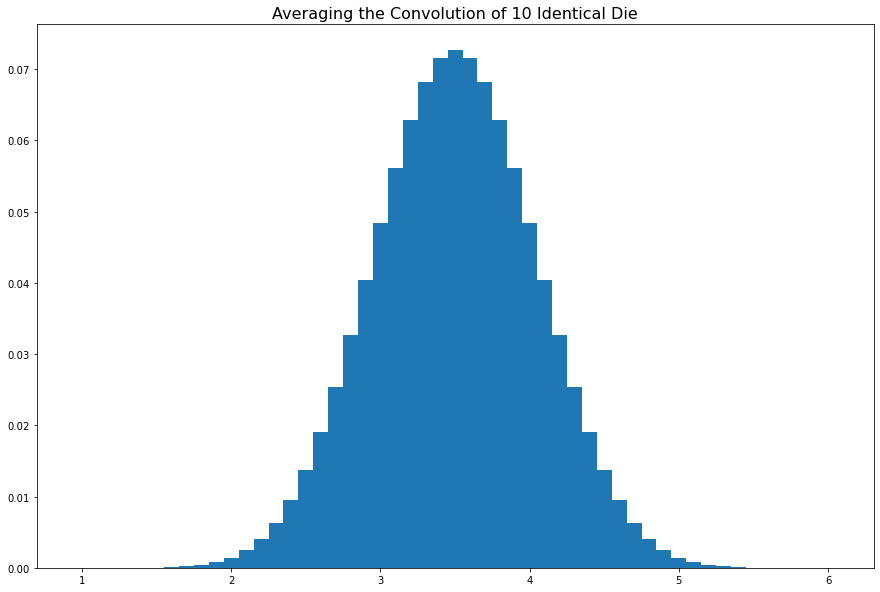

In [8]:
# We use a variable for our starting point to generalize the process a bit 
# to show we could do this for any number of dice.

N_dice = 10

# We then manipulate the x-axis of the distribution using the bins in order
# to graph the average of the 10 die.

bins = np.arange(N_dice, len(current_die)+N_dice+1)
bins = bins - (bins[1]-bins[0])/2
bins = bins / N_dice

# Finally, we use a stairs plot in order to get the best idea of what the distribution looks like
plt.stairs(current_die, bins, fill=True)
plt.title('Averaging the Convolution of 10 Identical Die', fontsize = 16) 
plt.show();

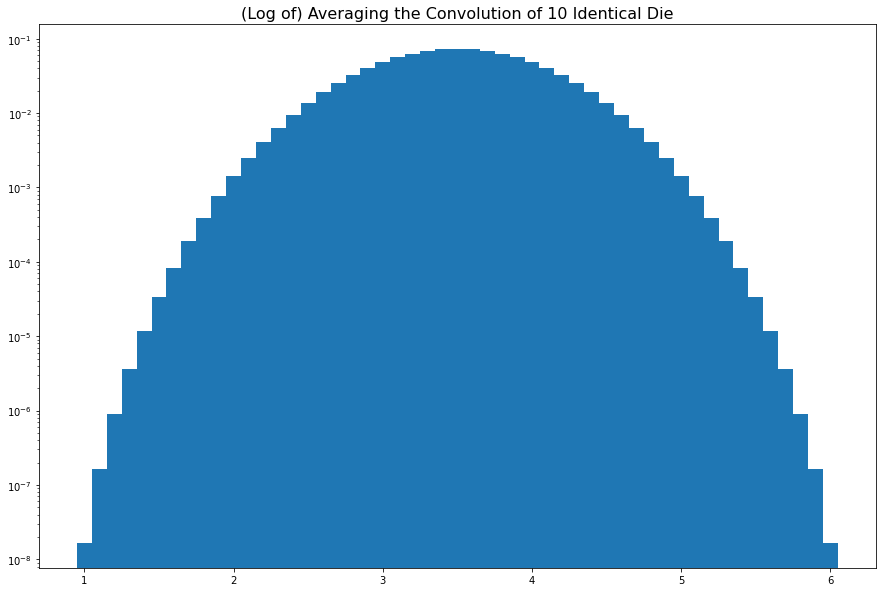

In [9]:
# To check whether the distribution is precisely Gaussian, 
# we graph the distribution on a semi-log plot.

plt.stairs(current_die, bins, fill=True)
plt.yscale('log')
plt.title('(Log of) Averaging the Convolution of 10 Identical Die', fontsize = 16)
plt.show()

While technically the distribution may not be exactly Gaussian (as we see when we graph it on the semi-log plot - not quite perfectly parabolic, left side seems to 'tail' a bit), we can see that it "approaches" a Gaussian-like distribution - so we may simplify our problem solving exercise going forward by approximating the distribution as a Gaussian. 

#### The Sum and Average of a Gaussian Distribution
We will now show that the sum and average of an initially Gaussian distribution is also a Guassian distribution (a hugely important result in statistics).

If we take $ x_{1}, x_{2}, x_{3},\ldots, x_{n} $ to be a random sample from a Gaussian distribution, such that 

$$ x_{i} \propto N(\mu,\sigma^{2}) , i=1,2,3,\ldots,n $$ 

The sum of all observations would be

$$ \sum_{i=1}^{n} x_{i} $$

With its mean being 

$$ \sum \frac{x_{i}}{n} $$

We know its generating function is given by the following:

$$ m_{x_{i}}(t) = e^{ut+\frac{1}{2}\sigma^{2}t^{2}} = E[e^{tx_{i}}]$$

Now, let $ y = \sum_{i=1}^{n} x_{i} $, thus y would have generating function:

$$ m_{y}(t) = E[e^{ty}] = E[e^{t\sum x_{i}}] = e^{nut+\frac{1}{2}n\sigma^{2}t^{2}} $$

Assuming all n are independent.

This is known form of a Gaussian distribution with mean = $nu$ and variance = $n\sigma^{2}$. Thus, we can infer that 

$$\sum_{i=1}^{n} x_{i} \propto N(n\mu,n\sigma^{2})$$

Now let $ z = \sum \frac{x_{i}}{n} $. We know the result of a given generating function $ m_{cx}(t) = m_{x}(ct) $, thus consider the generating function of z:

$$ m_{z}(t) = E[e^{tz}] = E[e^{t\sum \frac{x_{i}}{n}}] = E[e^{\sum x_{i}\frac{t}{n}}] = m_{\sum x_{i}(\frac{t}{n}}) = m_{y}(\frac{t}{n}) = e^{ut+\frac{1}{2}n\frac{\sigma^{2}}{n}t^{2}} $$

This generating function has a mean of $\mu$ and variance of $\frac{\sigma^{2}}{n}$ and its average is $\propto N(\mu, \frac{\sigma^{2}}{n})$.

##### We can conclude from this mathematical approach that the sum of a Gaussian distribution is only Gaussian if all elements are independent, and that the average of a Guassian distribution is still in fact Guassian. 